In [1]:
import pandas as pd
import numpy as np
import scipy
import numpy
from sklearn.preprocessing import Imputer

In [2]:
testfile = '/home/prashant/Desktop/kaggle/titanic/all/test.csv'
testDf = pd.read_csv(testfile)

In [3]:
trainfile = '/home/prashant/Desktop/kaggle/titanic/all/train.csv'
trainDf =  pd.read_csv(trainfile)

In [4]:
genderfile = '/home/prashant/Desktop/kaggle/titanic/all/gender_submission.csv'
genderDf = pd.read_csv(genderfile)

In [5]:
trainDf.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
datasetHasNan =True

In [7]:
trainDf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
columns_test = ['Pclass', 'Sex' , 'Age', 'Fare' , 'Embarked']
survived = ['Survived']

In [9]:
X=trainDf[columns_test]
y = trainDf[survived]

In [10]:
X['Age']=X['Age'].fillna(X['Age'].median() )
X['Embarked'].replace({"":np.nan}, inplace=True)
X['Embarked']= X['Embarked'].fillna(X['Embarked'].mode().iloc[0])
X.count()

/home/prashant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/prashant/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/prashant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

Pclass      891
Sex         891
Age         891
Fare        891
Embarked    891
dtype: int64

In [11]:
X['Embarked'].value_counts()


S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
s ={'male':0, 'female' :1}

In [13]:
X['Sex'] = X['Sex'].apply(lambda x : s[x])

/home/prashant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
e ={'S':0, 'C' :1, 'Q' : 2}
X['Embarked'] = X['Embarked'].apply(lambda x : e[x] )

/home/prashant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [17]:
from sklearn import svm

In [18]:
clf =svm.LinearSVC()

In [19]:
clf.fit(X_train, y_train)

/home/prashant/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [20]:
clf.score(X_test, y_test)

0.6949152542372882

In [21]:
trainDf[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.000000
9,5.00,1.000000
79,63.00,1.000000
68,53.00,1.000000
1,0.67,1.000000
17,13.00,1.000000
16,12.00,1.000000
87,80.00,1.000000
2,0.75,1.000000
4,0.92,1.000000


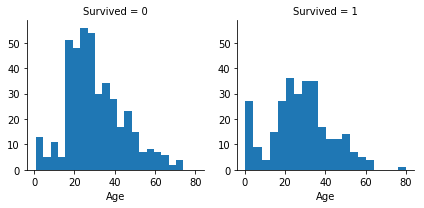

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
g = sns.FacetGrid(trainDf, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [23]:
trainDf['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
trainDf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
trainDf=trainDf.drop(['Cabin','Ticket'],axis=1)
testDf=testDf.drop(['Cabin','Ticket'],axis=1)

In [26]:
combine=[trainDf,testDf]

In [27]:
combine[1].shape

(418, 9)

In [28]:
for data in combine:
    data['Title']=data.Name.str.extract('([A-Za-z]+)\.',expand=False)

In [29]:
pd.crosstab(trainDf['Title'],trainDf['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [30]:
for data in combine:
    data['Title']=data['Title'].replace(['Lady','Countess','Col','Capt','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    data['Title']=data['Title'].replace(['Ms','Mlle'],'Miss')
    data['Title']=data['Title'].replace('Mme','Mrs')
    

In [31]:
trainDf[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [32]:
titleMap={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}

In [33]:
for data in combine:
    data['Title']=data['Title'].map(titleMap)
    data['Title']=data['Title'].fillna(0)

In [34]:
trainDf=trainDf.drop(['PassengerId','Name'],axis=1)

In [35]:
testDf=testDf.drop(['Name'],axis=1)

In [36]:
combine=[trainDf,testDf]

In [37]:
for data in combine:
    data['Sex']=data['Sex'].map({'male':0,'female':1}).astype(int)